In [208]:
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math as math


#assumptions
timeline = 7
CPI = 3
DNU = 100

#linear cumulative ARPU equation: y = .05x

ARPDAU = [ ( .05 * x ) - ( .05 * ( x - 1 ) ) if x > 1 
    else ( .05 * ( x ) ) for x in np.arange( 1, ( timeline + 1 ) ) ]
blended_ARPU = np.dot( list( range( timeline, 0, -1 ) ), ARPDAU )
print( blended_ARPU )
#this is the revenue generated by all cohorts over the timeline (=7 days in this example)

1.4000000000000001


In [209]:
total_recoup = ( blended_ARPU * DNU )
total_cost = CPI * DNU * timeline
total_recoup = total_recoup / total_cost
print( str( round( total_recoup * 100, 2 ) ) + '%' )

6.67%


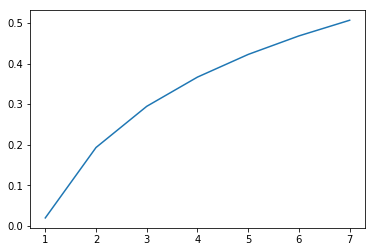

In [210]:
#logarithmic cumulative ARPU equation: y = 0.25*ln(x)+0.02
plt.plot( np.arange( 1, ( timeline + 1 ) ), [ ( .25 * np.log( x ) + .02 ) for x in np.arange( 1, ( timeline + 1 ) ) ] )
# ^ Cumulative ARPDAU

37.92911817441509


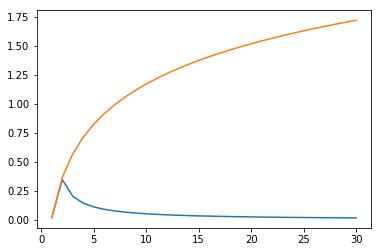

In [211]:
timeline = 30

#logarithmic cumulative ARPU equation: y = 0.25*ln(x)+0.02
ARPDAU = [ ( .5 * np.log( x ) + .02) - ( .5 * np.log( x - 1 ) + .02 ) if x > 1 
    else ( .5 * np.log( x ) + .02 ) for x in np.arange( 1, ( timeline + 1 ) ) ]
blended_ARPU = np.dot( list( range( timeline, 0, -1 ) ), ARPDAU )
print( blended_ARPU )
plt.plot( np.arange( 1, ( timeline + 1 ) ), [ ( .5 * np.log( x ) + .02) - ( .5 * np.log( x - 1 ) + .02 ) if x > 1 
    else ( .5 * np.log( x ) + .02 ) for x in np.arange( 1, ( timeline + 1 ) ) ] )
# ^ ARPDAU
plt.plot( np.arange( 1, ( timeline + 1 ) ), [ ( .5 * np.log( x ) + .02 ) for x in np.arange( 1, ( timeline + 1 ) ) ] )
# ^ Cumulative ARPDAU
plt.show()

#again, the revenue generated by all cohorts over the timeline

In [212]:
total_recoup = ( blended_ARPU * DNU )
total_cost = CPI * DNU * timeline
total_recoup = total_recoup / total_cost
print( str( round( total_recoup * 100, 2 ) ) + '%' )

42.14%


In [ ]:
=======

In [214]:
def get_total_return_date( timeline, CPI, DNU, equation ):
    #equation contains a and c for the formula y = a*ln(x)+c
    
    ARPDAU = [ equation[ 'a' ] * np.log( x ) + equation[ 'c' ] for x in np.arange( 1, ( timeline + 1 ) ) ]
    blended_ARPU = sum( ARPDAU )

    total_recoup = ( blended_ARPU * DNU )
    total_cost = CPI * DNU * timeline

    total_recoup = total_recoup / total_cost

    i = 1
    while total_recoup < 1:
        ARPDAU = [ equation[ 'a' ] * np.log( x ) + equation[ 'c' ] for x in np.arange( 1, ( timeline + 1 + i ) ) ]
        blended_ARPU = sum( ARPDAU )

        total_recoup = ( blended_ARPU * DNU )
        total_cost = CPI * DNU * timeline

        total_recoup = total_recoup / total_cost
        i += 1
        if i > 100:
            return False
    return i + timeline

In [215]:
total_timeline = get_total_return_date( timeline, CPI, DNU, { 'a': .5, 'c': .02 } )
print( total_timeline )

59


In [216]:
def get_cohort_return_timeline( CPI, DNU, equation ):
    #equation contains a and c for the formula y = a*ln(x)+c
    
    #month length is the timeline that we calculate blended return across
    month_length = 30
    timeline = month_length
    
    ARPDAU = [ equation[ 'a' ] * np.log( x ) + equation[ 'c' ] for x in np.arange( 1, ( month_length + 1 ) ) ]
    blended_ARPU = sum( ARPDAU )

    total_recoup = ( blended_ARPU * DNU )
    total_cost = CPI * DNU * timeline

    total_recoup = total_recoup / total_cost
    
    if total_recoup >= 1:
        return True

    i = 1
    while total_recoup < 1:
        ARPDAU = [ equation[ 'a' ] * np.log( x ) + equation[ 'c' ] for x in np.arange( 1, ( month_length + 1 ) ) ]
        blended_ARPU = sum( ARPDAU )

        total_recoup = ( blended_ARPU * DNU )
        total_cost = CPI * DNU * ( timeline - i )

        total_recoup = total_recoup / total_cost
        i += 1
        if i > month_length:
            return False
    return ( timeline - i ), total_recoup

In [217]:
total_timeline, total_recoup = get_cohort_return_timeline( CPI, DNU, { 'a': .5, 'c': .02 } )
print( total_timeline )
print( total_recoup * 100 )

11
105.35866159559748
